# Introduction: CNN Model for Image Classification

Accurate and timely weather prediction can provide critical information for businesses in fields such as agriculture and transportation. This information can be used to make informed decisions and take necessary actions to mitigate potential risks. However, traditional weather forecasting methods can be limited in their accuracy and efficiency. They also require massive models which perform predictions using complex physical relationships and a large number of independent variables. By leveraging the power of deep learning techniques such as convolutional neural networks (CNNs), the accuracy of weather prediction can be improved and businesses can be equipped with more reliable and real time forecasts.

## Problem Statement
Task is to develop a CNN model that can accurately classify landscape images based on the weather in the captured image.

## Outline
The overall objective of this assignment is to build a CNN model to classify landscape images based on the weather captured in an image. The different stages involved in the process are outlined below:

- Stage 1 - Setup
  - Task 1 - Import required modules
  - Task 2 - Load the data
  - Task 3 - Explore the data
- Stage 2 - Data preparation
  - Task 4 - Resize all images to the same dimensions
  - Task 5 - Prepare the data for feeding into CNNs
- Stage 3 - Simple model
  - Task 6 - Define a function to build a CNN model
  - Task 7 - Create a simple CNN model and analyze its performance
- Stage 4 - Data augmentation
  - Task 8 - Create a transformed image
  - Task 9 - Divide the data by class
  - Task 10 - Augment the training data
  - Task 11 - Create a simple CNN model using the augmented data and analyze its performance
- Stage 5 - Optimal model
  - Task 12 - Tune the CNN model
- Stage 6 - Testing
  - Task 13 - Train your optimal model satisfactorily




# Stage 1 - Setup
In this stage, you will set up the environment for this assignment by loading the required methods and the data required to train your model. You will explore the data set by displaying some images and examining attributes of different variables. You will achieve all of this by completing the following three tasks:
- Task 1 - Import required modules
- Task 2 - Load the data
- Task 3 - Explore the data

## Task 1 - Import required modules

First, import the required packages and modules.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
import tensorflow.image as tfi
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")


Now write code to suppress warnings.

In [2]:
import warnings
warnings.filterwarnings("ignore")


### Checklist

- Imported the required packages
- Suppressed warnings


## Task 2 - Load the data

Now define the *load_data()* function.

In [3]:
import os
from tensorflow.keras.utils import load_img

def load_data(mainfolder):
    
    list_of_images = []
    image_labels = []
    
    for folder in os.listdir(mainfolder):
        folder_path = os.path.join(mainfolder, folder)
        
        if os.path.isdir(folder_path):  
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                
                # Load the image and store it
                img = load_img(img_path)
                list_of_images.append(img)
                
                # Append the folder name (i.e., 'sunny', 'rainy', 'cloudy') as the label
                image_labels.append(folder)
    
    return list_of_images, image_labels

# Load training data
train_folder = r"C:\Users\HP\Downloads\Files\weatherdata\weather\train"
train_images, train_labels = load_data(train_folder)

Finally, use the *load_data()* function to load the training and testing data.

In [4]:
train_folder = r"C:\Users\HP\Downloads\Files\weatherdata\weather\train"
test_folder = r"C:\Users\HP\Downloads\Files\weatherdata\weather\test"
# Load the training data
X_train, y_train = load_data(train_folder)

# Load the testing data
X_test, y_test = load_data(test_folder)

# Check the loaded data
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")
print(f"Unique training labels: {set(y_train)}")
print(f"Unique testing labels: {set(y_test)}")

Number of training samples: 505
Number of testing samples: 45
Unique training labels: {'sunny', 'cloudy', 'rainy'}
Unique testing labels: {'sunny', 'cloudy', 'rainy'}


### Checklist
- Defined the *load_data()* function which takes in the given keyword arguments and returns the given variables
- Used the *load_data()* function to load *X_train, y_train, X_test,* and *y_test*
- *X_train, y_train, X_test,* and *y_test* are of the type *list*
- Items in *X_train* and *X_test* are of the type *PIL.JpegImagePlugin.JpegImageFile*
- Items in *y_train* and *y_test* are of the type *str*


## Task 3 - Explore the data

First, display images from the training and testing data sets.


In [5]:
# Use this cell to view a few images from the training data set for each class

def view_sample_images(data, labels, classes, title="Training Data"):
    plt.figure(figsize=(10, 5))
    for i, cls in enumerate(classes):
        idx = labels.index(cls)  # Find index of the first occurrence of the class
        plt.subplot(1, len(classes), i+1)
        plt.imshow(data[idx])
        plt.title(cls)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

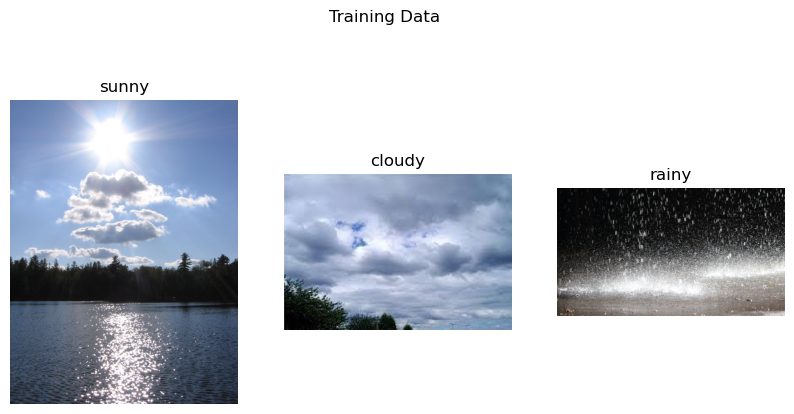

In [6]:
# Assuming y_train contains class labels, and X_train contains images
classes = list(set(y_train))
view_sample_images(X_train, y_train, classes, title="Training Data")

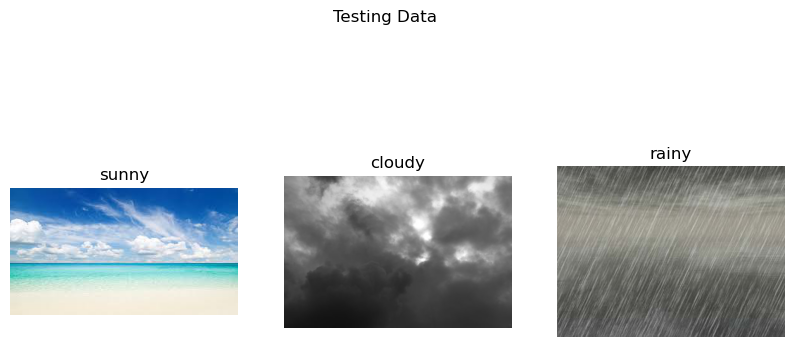

In [7]:
# Use this cell to view a few images from the testing data set for each class
view_sample_images(X_test, y_test, classes, title="Testing Data")

Print the number of training and testing data points available to you.

In [8]:
# Use this cell to inspect the number of training and testing data points available
print(f'Number of training data points: {len(X_train)}')
print(f'Number of testing data points: {len(X_test)}')

Number of training data points: 505
Number of testing data points: 45


Store the number of classes in this classification exercise.

In [9]:
# Use this cell to extract and store the total class count
# Extract and store the total class count
n_classes = len(set(y_train))
print('Number of classes =', n_classes)

Number of classes = 3


Print the number of data points from each class in the training and testing data sets.

In [10]:
# Use this cell to inspect the number of training and testing data points available in each class

# Print the number of data points from each class in the training data set
import numpy as np

# Get unique class names and their counts
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Display number of data points in each class
print("Training Data Class Counts:")
for cls, count in zip(unique_train, counts_train):
    print(f'{cls}: {count} samples')

print("\nTesting Data Class Counts:")
for cls, count in zip(unique_test, counts_test):
    print(f'{cls}: {count} samples')


Training Data Class Counts:
cloudy: 285 samples
rainy: 70 samples
sunny: 150 samples

Testing Data Class Counts:
cloudy: 15 samples
rainy: 15 samples
sunny: 15 samples


Finally, visualze the class balance in the training data set.

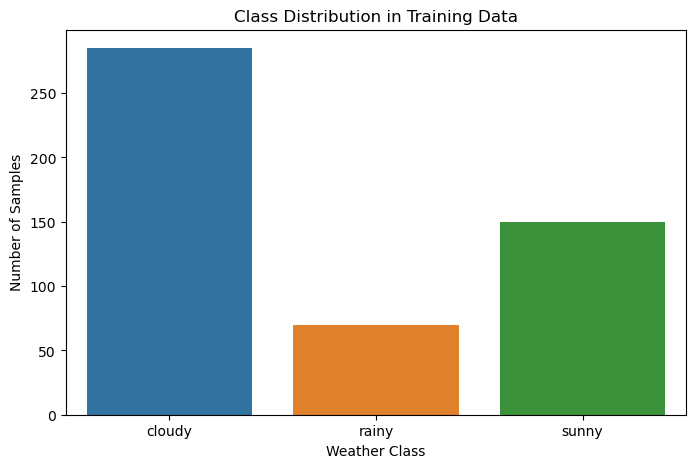

In [11]:
# Use this cell to visualize the class balance in the training data set

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, order=np.unique(y_train))
plt.title("Class Distribution in Training Data")
plt.xlabel("Weather Class")
plt.ylabel("Number of Samples")
plt.show()

### Checklist
- Viewed one sample image from each class for training and testing data sets
- Length of *X_train* is 505
- Length of *X_test* is 45
- The "cloudy" class has 285 data points in the training data set
- The "rainy" class has 70 data points in the training data set
- The "sunny" class has 150 data points in the training data set
- Created a visualization for class balance in the training data set

# Stage 2 - Data Preparation
In this stage, you will perform some basic essential data preparation methods on your image data so that they are ready for use in CNNs. 

To prepare the data, you will first need to resize the images in the training and testing data sets to the same size. This can be done using some methods provided to us in the *tensorflow* library. Second, you will convert the data into a format that is suitable to be fed into a Keras CNN model.

You will achieve this by completing the following tasks:
- Task 4 - Resize all images to the same dimension
- Task 5 - Prepare the data for feeding into CNN

## Task 4 - Resize all images to the same dimensions


First, obtain the smallest image dimensions in training and testing data sets.

In [12]:
# Use this cell to obtain the smallest image dimensions in the training and testing data sets

smallest_train_dim = min([min(image.size) for image in X_train])
smallest_test_dim = min([min(image.size) for image in X_test])

print(f'Smallest image dimension in training data: {smallest_train_dim}')
print(f'Smallest image dimension in testing data: {smallest_test_dim}')

Smallest image dimension in training data: 111
Smallest image dimension in testing data: 160


Now define the *resize_images()* function.

In [13]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import numpy as np

# Define a function that resizes image dimensions
def resize_images(input_images, new_dims):
    
    resized_images = []
    for img in input_images:
        img_array = img_to_array(img)  # Convert the image to array
        resized_img_array = tf.image.resize(img_array, [new_dims, new_dims])  # Resize
        resized_img = array_to_img(resized_img_array)  # Convert array back to image
        resized_images.append(resized_img)
    
    return resized_images


Next, decide on a new image dimension.


In [14]:
# Set the new dimensions for all images
new_image_dims = 64


Use the *resize_images()* method to resize your training and testing images.

In [15]:
# Standardize the dimensions for all images in the training data set
X_train = resize_images(X_train, new_image_dims)

# Standardize the dimensions for all images in the testing data set
X_test = resize_images(X_test, new_image_dims)


View some images from the resized data set.

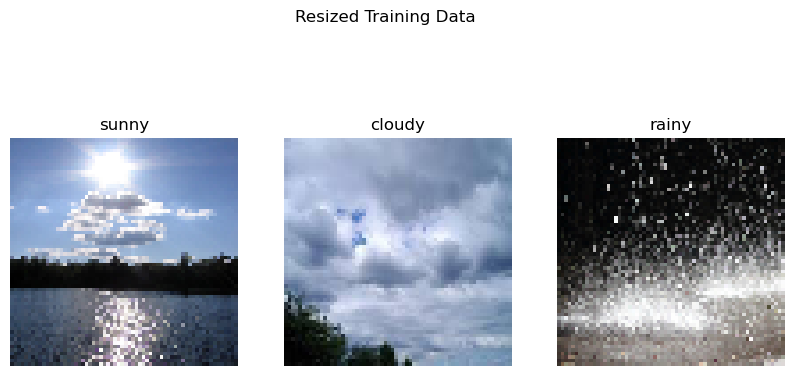

In [16]:
# Use this cell to view a few images from the training data set for each class
view_sample_images(X_train, y_train, classes, title="Resized Training Data")


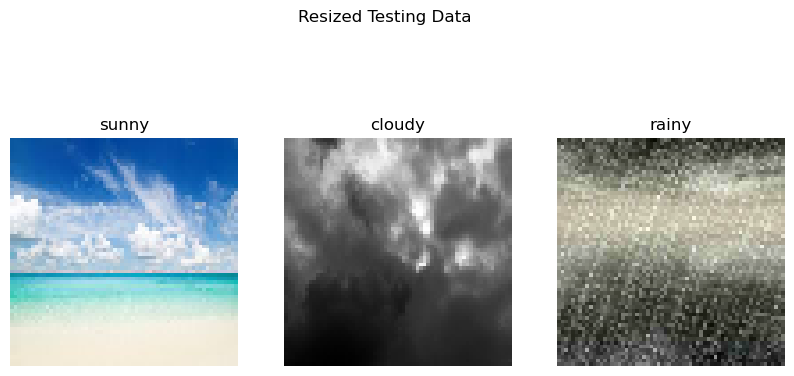

In [17]:
# Use this cell to view a few images from the testing data set for each class

view_sample_images(X_test, y_test, classes, title="Resized Testing Data")

Finally, save the resized data set into variables that will be useful later.

In [18]:
# Store the resized images for later use
X_pre_NN = X_train

# Store the labels for later use
y_pre_NN = y_train


### Checklist
- Smallest image dimension in the training data is 111
- Smallest image dimension in the testing data is 160
- Defined the *resize_images()* function using the given keyword arguments and return variables
- Declared the new image dimension in a variable called *new_image_dims*
- Resized images in both *X_train* and *X_test*
- Saved the resized data sets into new variables for later use

## Task 5 - Prepare the data for feeding into CNN


First, convert the input data into numpy arrays.

In [19]:
# Use this cell to convert the training and testing images into arrays

X_train = np.array([img_to_array(img) for img in X_train])
X_test = np.array([img_to_array(img) for img in X_test])

Now, rescale the data.

In [20]:
# Use this cell to rescale the training and testing images from the range [0, 255] to [0, 1]

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

Now convert the image labels to one-hot encoded vectors.

In [21]:
# Use this cell to one-hot encode the labels in the training and testing data sets
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Convert labels to integers
y_test_encoded = label_encoder.transform(y_test)

# Convert to one-hot encoded vectors
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)

Finally, save the input dimensions for the CNNs in a variable so that you can call or refer to it when building CNN models.

In [22]:
# Store the input dimensions for the CNNs
inputdims = X_train.shape[1:]  # (64, 64, 3)

In [23]:
# Printing to verify shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("inputdims:", inputdims)

X_train shape: (505, 64, 64, 3)
X_test shape: (45, 64, 64, 3)
y_train shape: (505, 3)
y_test shape: (45, 3)
inputdims: (64, 64, 3)


### Checklist
- *X_train* is an *ndarray* of shape $(505, 64, 64, 3)$
- *X_test* is an *ndarray* of shape $(45, 64, 64, 3)$
- Values in *X_train* and *X_test* range from $0$ to $1$
- *y_train* is an *ndarray* of shape $(505, 3)$
- *y_test* is an *ndarray* of shape $(45, 3)$
- Values in *y_train* and *y_test* are either $0$ or $1$
- *inputdims* contains the expected shape of the input for a CNN model, and is equal to $(64, 64, 3)$

# Stage 3 - Simple Model
In this stage, you will build, train and evaluate a basic CNN model on the data and analyze its performance. You will build the model using a function. This will help you change the configuration of your model during execution. You will also test the performance of the performance of the model by training it multiple times and then judging the distribution of final accuracies and loss values.

You will do all this with the help of the following tasks:
- Task 6 - Define a function to build a CNN model
- Task 7 - Create a simple CNN model and analyze its performance

## Task 6 - Define a function to build a CNN model


Define the *create_cnn()* function.

In [24]:
# Use this cell to define a function that creates and compiles a CNN

# Define a function that creates and compiles a CNN
def create_cnn(layers_config, learning_rate_value):
    '''
    Creates and compiles a convolutional neural network (CNN) with the specified layers configuration and learning rate.
    
    Args:
        layers_config: A list of strings specifying the configuration of each layer in the CNN.
        learning_rate_value: A float specifying the learning rate to be used by the optimizer during training.
    
    Returns:
        cnn: A compiled CNN with the specified layers configuration and learning rate.
    '''

    cnn = Sequential()

    # Input layer (fix input dimensions)
    cnn.add(Conv2D(filters=layers_config[0]['filters'], 
                   kernel_size=layers_config[0]['kernel_size'], 
                   activation='relu', 
                   input_shape=inputdims))

    # Iterate over the layers configuration to add layers dynamically
    for layer in layers_config[1:]:
        if layer['type'] == 'conv':
            cnn.add(Conv2D(filters=layer['filters'], 
                           kernel_size=layer['kernel_size'], 
                           activation='relu'))
        elif layer['type'] == 'pool':
            cnn.add(MaxPooling2D(pool_size=layer['pool_size']))
        elif layer['type'] == 'flatten':
            cnn.add(Flatten())
        elif layer['type'] == 'dense':
            cnn.add(Dense(units=layer['units'], activation='relu'))
    
    # Output layer (fixed as per task description)
    cnn.add(Dense(units=3, activation='softmax'))  # Assuming 3 classes

    # Compile the CNN model
    optimizer = Adam(learning_rate=learning_rate_value)
    cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return cnn

### Checklist
- Defined a function *create_cnn()* with given keyword arguments and return variables
- Followed the recommended specifications in the model

## Task 7 - Create a simple CNN model and analyze its performance

First, save the number of trials in a variable.

In [25]:
# Set the number of trials for each model training instance
num_trials = 10

Now save the number of epochs and the validation split in a variable.

In [26]:
# Set the number of epochs for CNN training
n_epochs = 10

# Set the validation split fraction
val_split = 0.2

In [27]:
# Suggested CNN network configuration
layers_config = [
    {'type': 'conv', 'filters': 2, 'kernel_size': 3},   # Conv Layer with 2 filters, kernel size 3x3
    {'type': 'pool', 'pool_size': 2},                   # Max Pooling Layer with size 2x2
    {'type': 'conv', 'filters': 4, 'kernel_size': 3},   # Conv Layer with 4 filters, kernel size 3x3
    {'type': 'pool', 'pool_size': 2},                   # Max Pooling Layer with size 2x2
    {'type': 'flatten'},                                # Flattening Layer
    {'type': 'dense', 'units': 8}                       # Dense Layer with 8 neurons
]


Finally, create train and evaluate your CNN model.

In [28]:
# Function to train the model for a single trial
def train_cnn_model(trial_num):
    # Create the CNN model
    model = create_cnn(layers_config=layers_config, learning_rate_value=0.001)

    # Train the model
    history = model.fit(X_train, y_train, epochs=n_epochs, validation_split=val_split, verbose=0)

    # Extract the performance metrics
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    
    return train_acc, val_acc

# Initialize an empty list to store performance data
performance_data = []

# Run multiple trials and store the performance
for trial in range(1, num_trials + 1):
    train_acc, val_acc = train_cnn_model(trial)
    performance_data.append([trial, train_acc, val_acc])

# Convert the performance data to a DataFrame
performance_df = pd.DataFrame(performance_data, columns=['Trial Number', 'Training Accuracy', 'Validation Accuracy'])

# Calculate summary statistics
mean_train_acc = performance_df['Training Accuracy'].mean()
mean_val_acc = performance_df['Validation Accuracy'].mean()

median_train_acc = performance_df['Training Accuracy'].median()
median_val_acc = performance_df['Validation Accuracy'].median()

max_train_acc = performance_df['Training Accuracy'].max()
max_val_acc = performance_df['Validation Accuracy'].max()

# Append the summary statistics to the DataFrame
performance_df.loc['Mean'] = ['Mean', mean_train_acc, mean_val_acc]
performance_df.loc['Median'] = ['Median', median_train_acc, median_val_acc]
performance_df.loc['Max'] = ['Max', max_train_acc, max_val_acc]

# Display the performance DataFrame
print(performance_df)

       Trial Number  Training Accuracy  Validation Accuracy
0                 1           0.705446             0.000000
1                 2           0.821782             0.237624
2                 3           0.764852             0.227723
3                 4           0.762376             0.000000
4                 5           0.750000             0.049505
5                 6           0.742574             0.257426
6                 7           0.705446             0.000000
7                 8           0.794554             0.009901
8                 9           0.727723             0.000000
9                10           0.752475             0.000000
Mean           Mean           0.752723             0.078218
Median       Median           0.751238             0.004950
Max             Max           0.821782             0.257426


Looking at the *performance_df* data frame, you should be able to conclude that the model seems to be performing reasonably well on the training data, but its performance is very poor on the validation data.

There is a high likelihood that the class imbalance in the data set is contributing to this poor performance.

Also, it wouldn't be incorrect to say that the training data size is quite less.

One way to resolve these issues is to perform data augmentation. This will increase the size of the training data set so that the model will have enough data to train on. Using augmentation, we can also ensure that the classes in the training data are balanced.

### Checklist
- Saved values for number of trials, number of epochs, and validation split in variables
- Created and trained a simple CNN model multiple times and evaluated its performance
- Displayed the model's performance over multiple trials and the summary statistics in the given format

# Stage 4 - Data Augmentation
Data augmentation is a technique that is commonly used in deep learning to artificially increase the size of the training data set.

You can add augmented images to your your training data to improve the class balance in the training data set and also to increase the size of the training data.

In this stage, you will augment your training data to increase the training data size and improve the class balance in the training data set. You will then retrain your basic CNN model on the augmented data set and analyze its performance over multiple training trials.

In the first three tasks of this stage, you will write functions and helper functions to perform data augmentation. Whereas in the fourth task, you will use those functions to actually perform data augmentation. The tasks are given below:
- Task 8 - Create a transformed image
- Task 9 - Divide the data according to class
- Task 10 - Augment the data
- Task 11 - Create a simple CNN model using the augmented data and analyze its performance

## Task 8 - Create a transformed image

Retrieve the training data that you saved in an earlier stage before conducting data preparation on it for feeding into CNNs.

In [29]:
# Retrieve the training images
X_train = X_pre_NN

# Retrieve the training labels
y_train = y_pre_NN

Now, define the function *random_transform()* that takes in an image and creates a new image from it using a random transformation.

In [30]:
# Define a function that takes in an input image and creates a new image out of it using some random augmentation
def random_transform(input_image):

    # Convert PIL image to array
    image_array = img_to_array(input_image)
    
    # Randomly choose a transformation
    transform_choice = random.choice(['flip_left_right', 'flip_up_down', 'rotate_90', 'rotate_180', 'rotate_270'])
    
    if transform_choice == 'flip_left_right':
        transformed_array = tf.image.flip_left_right(image_array)
    elif transform_choice == 'flip_up_down':
        transformed_array = tf.image.flip_up_down(image_array)
    elif transform_choice == 'rotate_90':
        transformed_array = tf.image.rot90(image_array, k=1)  # Rotate 90 degrees
    elif transform_choice == 'rotate_180':
        transformed_array = tf.image.rot90(image_array, k=2)  # Rotate 180 degrees
    elif transform_choice == 'rotate_270':
        transformed_array = tf.image.rot90(image_array, k=3)  # Rotate 270 degrees
    
    # Convert array back to a PIL image
    output_image = array_to_img(transformed_array)
    
    return output_image


You can now test your function on any input image and view the results. Note that if you defined your function correctly, each time you run the following cell, a random augmentation would be performed.

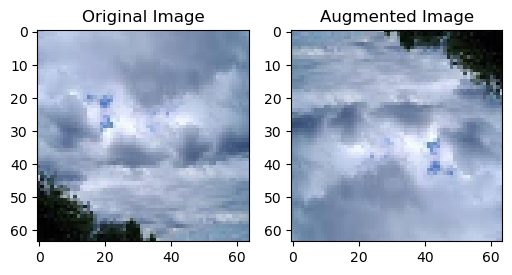

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import random  # Import the random module
import matplotlib.pyplot as plt

# Choose a random image from the training set
sample_image = array_to_img(X_train[0])

# Apply random transformation
augmented_image = random_transform(sample_image)

# Display original and augmented images side by side
plt.figure(figsize=(6, 3))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(sample_image)

# Augmented image
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_image)

plt.show()

### Checklist
- Retrieved data stored in *X_pre_NN* and *y_pre_NN*
- Defined the *random_transform()* function using the keyword arguments and return variables described above
- Experimented with the *random_transform()* function and verified that the function randomly augments an input image

## Task 9 - Divide the data by class


### Description

Recall the countplot that you created earlier that represented the number of elements in the training data set belonging ot the different classes.

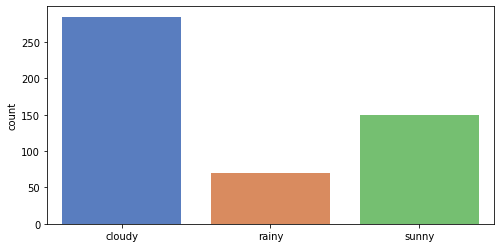

As you have seen before in the bar graph given above, there is class imbalance in the data set. Moreover, the total number of records in the train data set is small at 550. Since we want to augment the training data such that all the classes have the same number of samples, we need to create new images for the different classes separately as we will need to increase the number of images in the three data sets by a different number in each data set. So, it is benefical to define a helper function that divides the training data into its respective classes.

In this task, you will define the *divide_data_by_class()* helper function that does this.

The main function will then use these two helper functions (*random_transform()* and *divide_data_by_class()*) to augment the training data set with additional images such that: 
1.   All the classes have the same number of samples
2.   The total amount of training data is larger than the original training data set

Now, you will define the *divide_data_by_class()* helper function that divides the input images and their labels into sublists based on their corresponding class labels. Given the original list of all images and the list of their corresponding labels, as the output of this function, you need to create three lists of images and the respective three lists of labels corresponding to the three unique labels present in our data set. Before returning the data, you can save the three image lists in a list and the three label lists in another list.

Visualize the class balance in the training data set using a bar plot or a count plot.

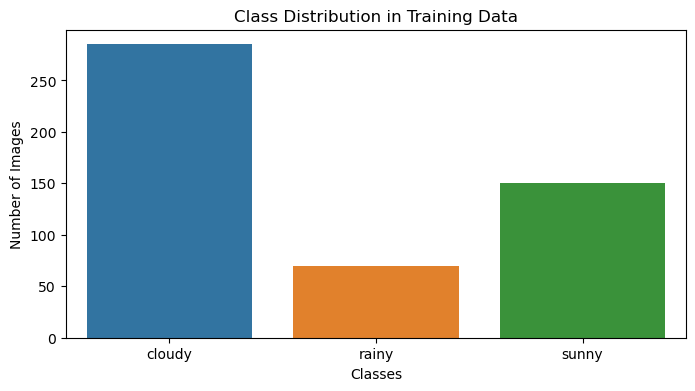

In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train contains the labels of the training images
unique_classes, counts = np.unique(y_train, return_counts=True)

# Visualize the class balance using a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=unique_classes, y=counts)
plt.title("Class Distribution in Training Data")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

You can see that the classes in the training data are quite imbalanced. Moreover, the number of training samples is quite small as well.

Now, define the function *divide_data_by_class()* that divides the input images and labels into subsets based on their corresponding class labels.

In [33]:
# Use this cell to define a function that takes in the list of training images and labels and returns them class-wise

# Define a function that takes in the list of training images and returns them class-wise
# Function to divide data by class
def divide_data_by_class(input_images, image_labels):
    
    # Get the unique class labels
    unique_labels = np.unique(image_labels)
    
    # Initialize empty lists to hold the classwise images and labels
    classwise_images = [[] for _ in range(len(unique_labels))]
    classwise_labels = [[] for _ in range(len(unique_labels))]
    
    # Iterate over the input images and labels
    for image, label in zip(input_images, image_labels):
        # Find the index of the class label
        class_index = np.where(unique_labels == label)[0][0]
        
        # Append the image and label to the respective sublist
        classwise_images[class_index].append(image)
        classwise_labels[class_index].append(label)
    
    return classwise_images, classwise_labels


You can now use the *divide_data_by_class()* function on the data set and view the results.

In [34]:
# Use this cell to divide the training data into its respective classes and labels
# Note: This is a sample execution and the actual augmentation function will be defined in Task 10

# Divide the data into classes
classwise_images, classwise_labels = divide_data_by_class(X_train, y_train)

# Output the number of images in each class
for i, class_label in enumerate(unique_classes):
    print(f"Class {class_label}: {len(classwise_images[i])} images")



Class cloudy: 285 images
Class rainy: 70 images
Class sunny: 150 images


### Checklist
- Visualized class balance in the data set
- The *divide_data_by_class()* function returns two lists that contain three lists each
- Experimented with the *divide_data_by_class()* function and ensured that it is functioning properly

## Task 10 - Augment the training data

Define the *augment_data()* function that works on the original training data and produces an augmented training data set from it.

In [35]:
import numpy as np
import random
from tqdm import tqdm  # Optional for progress tracking

def augment_data(input_images, image_labels, data_size_factor=1):
        
    # Step 1: Divide the dataset by class using divide_data_by_class()
    classwise_images, classwise_labels = divide_data_by_class(input_images, image_labels)
    
    # Step 2: Get the size of the largest class
    largest_class_size = max(len(class_images) for class_images in classwise_images)
    target_class_size = int(largest_class_size * data_size_factor)
    
    # Lists to store the new images and labels after augmentation
    new_images = []
    new_labels = []
    
    # Step 3: Augment the data for each class
    for class_images, class_labels in tqdm(zip(classwise_images, classwise_labels), total=len(classwise_images), desc="Augmenting data"):
        # Add original images and labels to the new dataset
        new_images.extend(class_images)
        new_labels.extend(class_labels)
        
        # Calculate how many more images are needed for this class
        num_new_images = target_class_size - len(class_images)
        
        # Randomly augment the existing images to fill up the class
        for _ in range(num_new_images):
            # Select a random image from the class
            random_idx = random.randint(0, len(class_images) - 1)
            random_image = class_images[random_idx]
            
            # Apply random transformation using random_transform()
            augmented_image = random_transform(random_image)
            
            # Add the augmented image and the corresponding label to the dataset
            new_images.append(augmented_image)
            new_labels.append(class_labels[0])  # All labels in this list are the same
    
    return new_images, new_labels


Use the *augment_data()* function to augment the training data.

In [36]:
# Use this cell to augment your training data

# Augment your training data using the "augment_data()" function
# Define your data size factor (e.g., 2x the size of the largest class)
data_size_factor = 2

# Augment the training data
X_train_augmented, y_train_augmented = augment_data(X_train, y_train, data_size_factor)


Augmenting data: 100%|███████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.02it/s]


Visualize the class balance in the augmented training data set using a bar plot or a count plot.

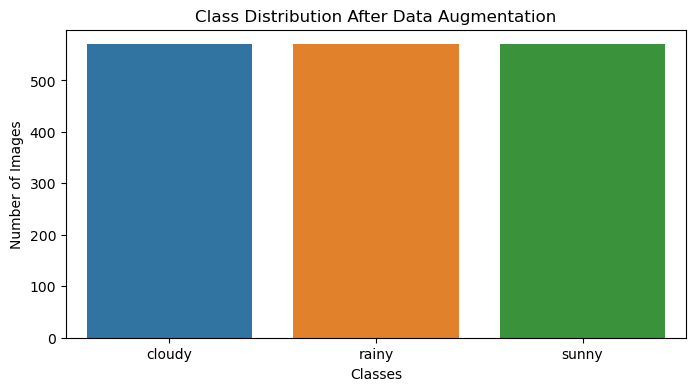

In [37]:
# Visualize the class balance after augmentation
augmented_classes, augmented_counts = np.unique(y_train_augmented, return_counts=True)

plt.figure(figsize=(8, 4))
sns.barplot(x=augmented_classes, y=augmented_counts)
plt.title("Class Distribution After Data Augmentation")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()


### Checklist
- Experimented with the *augment_data()* function and made sure that it is working properly
  - For example, if the *augment_data()* function is used on the original training data with a *data_size_factor* of 1, each class in the output data has 285 images, and the total number of images in the new list is 855. If *data_size_factor* was 2 instead, then each class in the output data has 570 images, and the total number images in the new list is 1710.
- Decided on a suitable value for the augmentation factor and augmented the training data

## Task 11 - Create a simple CNN model using the augmented data and analyze its performance


In [38]:
# Use this cell to rescale the training images from the range [0, 255] to [0, 1]
# Use this cell to one-hot encode the labels in the training data set
# Use this cell to create, train and evaluate your simple CNN model on the augmented data multiple times and store the performance results


In [39]:
# Check the size of each PIL image in X_train_augmented
for i, img in enumerate(X_train_augmented):
    print(f"Image {i} size: {img.size}")  # .size gives (width, height)



Image 0 size: (64, 64)
Image 1 size: (64, 64)
Image 2 size: (64, 64)
Image 3 size: (64, 64)
Image 4 size: (64, 64)
Image 5 size: (64, 64)
Image 6 size: (64, 64)
Image 7 size: (64, 64)
Image 8 size: (64, 64)
Image 9 size: (64, 64)
Image 10 size: (64, 64)
Image 11 size: (64, 64)
Image 12 size: (64, 64)
Image 13 size: (64, 64)
Image 14 size: (64, 64)
Image 15 size: (64, 64)
Image 16 size: (64, 64)
Image 17 size: (64, 64)
Image 18 size: (64, 64)
Image 19 size: (64, 64)
Image 20 size: (64, 64)
Image 21 size: (64, 64)
Image 22 size: (64, 64)
Image 23 size: (64, 64)
Image 24 size: (64, 64)
Image 25 size: (64, 64)
Image 26 size: (64, 64)
Image 27 size: (64, 64)
Image 28 size: (64, 64)
Image 29 size: (64, 64)
Image 30 size: (64, 64)
Image 31 size: (64, 64)
Image 32 size: (64, 64)
Image 33 size: (64, 64)
Image 34 size: (64, 64)
Image 35 size: (64, 64)
Image 36 size: (64, 64)
Image 37 size: (64, 64)
Image 38 size: (64, 64)
Image 39 size: (64, 64)
Image 40 size: (64, 64)
Image 41 size: (64, 64)
Im

In [40]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array


# Convert each image in X_train_augmented to a NumPy array
X_train_array = np.array([img_to_array(img) for img in X_train_augmented])  # Convert images to arrays


In [41]:
# Rescale the images
X_train_array = X_train_array / 255.0  # Rescale pixel values


In [42]:
# Map string labels to integers
label_mapping = {
    'cloudy': 0,
    'rainy': 1,
    'sunny': 2
}

# Convert string labels to integer labels
y_train_integer = [label_mapping[label] for label in y_train_augmented]

# One-hot encode the integer labels
y_train_array = to_categorical(y_train_integer, num_classes=len(label_mapping))


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),  # Adjust input shape based on your images
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_mapping), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_array, y_train_array, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_train_array, y_train_array)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.4550 - loss: 1.2526 - val_accuracy: 0.6813 - val_loss: 0.9514
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7407 - loss: 0.5855 - val_accuracy: 0.5819 - val_loss: 1.1702
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8174 - loss: 0.4385 - val_accuracy: 0.6988 - val_loss: 0.9196
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8923 - loss: 0.3003 - val_accuracy: 0.7573 - val_loss: 0.6349
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9202 - loss: 0.2169 - val_accuracy: 0.8275 - val_loss: 0.6604
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9612 - loss: 0.1265 - val_accuracy: 0.8129 - val_loss: 0.5937
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9694 - loss: 0.0994 - val_accuracy: 0.7456 - val_loss: 0.7636
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9723 - loss: 0.0884 - val_accuracy: 0.8158 - v

You should be able to observe, from the performance data frame, that the basic CNN model that is trained on the augmented data performs better, in general, than the basic CNN model that you trained earlier.

### Checklist
- Converted the augmented input data into arrays
- Scaled the augmented input data
- Encoded the output data as integers
- Performed one-hot encoding on output data
- Retrained the simple CNN model on the augmented data
- Created a data frame to analyze the performance of the model

# Stage 5 - Optimal Model
In this stage, you will train your CNN model on the augmented data set and tune it for network structure and learning rate. You will do this by completing Task 12 - Tune the CNN Model.

## Task 12 - Tune the CNN Model

Tune your CNN model for network structure and learning rate.

In [44]:
# Define network configurations
layers_config_list = [
    [16, 32, 64],        # Configuration 1: Fewer filters
    [8, 16, 32, 64]     # Configuration 2: More layers with even fewer filters
]

# Define learning rates
learning_rate_list = [0.001, 0.005]  # Include the default value and a slightly larger value


In [45]:
def create_cnn_model(layers_config, learning_rate):
    model = Sequential()
    
    # First layer
    model.add(Conv2D(layers_config[0], (3, 3), activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add additional layers based on configuration
    for filters in layers_config[1:]:
        model.add(Conv2D(filters, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    # Adjust the Dense layer size if needed
    model.add(Dense(64, activation='relu'))  # Reduced size for Dense layer
    model.add(Dense(len(label_mapping), activation='softmax'))  # Output layer
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

You should take some time and study the results of your hyperparameter tuning. Once you are satisfied with your analysis, decide on the optimal values of the hyperparameters to use.

In [46]:
# Use this cell to tune your CNN model for network structure and learning rate
import pandas as pd

# Store performance results
performance_results = []

# Loop through each combination of layers and learning rates
for layers_config in layers_config_list:
    for learning_rate in learning_rate_list:
        # Create the model
        model = create_cnn_model(layers_config, learning_rate)
        
        # Fit the model and store the history
        history = model.fit(X_train_array, y_train_array, 
                            epochs=10, 
                            batch_size=32, 
                            validation_split=0.2,
                            verbose=0)  # Set verbose=0 to avoid printing the output
        
        # Calculate the number of trainable parameters
        trainable_params = model.count_params()
        
        # Record the performance
        performance_results.append({
            'layers_config': str(layers_config),
            'learning_rate': learning_rate,
            'train_accuracy': history.history['accuracy'][-1],
            'val_accuracy': history.history['val_accuracy'][-1],
            'trainable_params': trainable_params
        })


In [47]:
# Convert performance results to DataFrame
results_df = pd.DataFrame(performance_results)

# Find the optimal configuration based on validation accuracy
optimal_model = results_df.loc[results_df['val_accuracy'].idxmax()]

# Store the optimal hyperparameters
optimal_layer_config = eval(optimal_model['layers_config'])  # Convert string back to list
optimal_learning_rate = optimal_model['learning_rate']

print(f'Optimal Layer Configuration: {optimal_layer_config}')
print(f'Optimal Learning Rate: {optimal_learning_rate}')



Optimal Layer Configuration: [8, 16, 32, 64]
Optimal Learning Rate: 0.005


In [48]:
# Verify the Number of Parameters
if optimal_model['trainable_params'] > 500000:
    print("Warning: Optimal model exceeds 500,000 trainable parameters!")
else:
    print("Optimal model is within the parameter limit.")


Optimal model is within the parameter limit.


### Checklist
- Decided on the values of hyperparameters over which to tune the model
- Trained multiple models for each combination of hyperparameters
- The optimal model has good and consistent validation accuracy

# Stage 6 - Testing
In this stage, you will train your optimal model multiple times on the augmented data set until you are satisfied with its performance on the validation data. You will then test your optimal model on the hold-out test data set, which has not been used up until this point.

## Task 13 - Train your optimal model satisfactorily

In [49]:
# Use this cell to train your optimal model on the augment data set until you are satisfied with its validation performance
# Define the minimum validation accuracy threshold
min_val_accuracy = 0.80
achieved_accuracy = 0.0
epochs = 20  # You can adjust the number of epochs

while achieved_accuracy < min_val_accuracy:
    # Create the model with the optimal configuration
    model = create_cnn_model(optimal_layer_config, optimal_learning_rate)
    
    # Train the model
    history = model.fit(X_train_array, y_train_array, 
                        epochs=epochs, 
                        batch_size=32, 
                        validation_split=0.2, 
                        verbose=1)  # Set verbose=1 to monitor training progress
    
    # Update the achieved accuracy from the latest validation accuracy
    achieved_accuracy = history.history['val_accuracy'][-1]
    print(f'Current validation accuracy: {achieved_accuracy:.4f}')

print(f'Final validation accuracy achieved: {achieved_accuracy:.4f}')


Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4290 - loss: 1.0781 - val_accuracy: 0.0000e+00 - val_loss: 1.8938
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5237 - loss: 0.9168 - val_accuracy: 0.0000e+00 - val_loss: 1.5010
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6483 - loss: 0.7720 - val_accuracy: 0.0000e+00 - val_loss: 1.5135
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7483 - loss: 0.5227 - val_accuracy: 0.6023 - val_loss: 1.0893
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8072 - loss: 0.4331 - val_accuracy: 0.4795 - val_loss: 1.7404
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8168 - loss: 0.5053 - val_accuracy: 0.6316 - val_loss: 1.1371
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8054 - loss: 0.4201 - val_accuracy: 0.6374 - val_loss: 0.8503
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8676 - loss: 0.3277 - val_accuracy

In [50]:
# Obtain the perfomance metrics of the optimal model on the testing data set using the "evaluate()" method
# Use this cell to test your optimal model on the hold-out test data set
performance_test = model.evaluate(X_test, y_test)

print('The accuracy of the model on the testing data is {:.4f}'.format(performance_test[1]))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8694 - loss: 0.6917 
The accuracy of the model on the testing data is 0.8667


### Checklist
- Decided on a minimum validation accuracy
- Trained multiple models till that accuracy is achieved
- Your optimal model does well on the testing data

Now that you have completed all the tasks in the assignment, please move on to create your analysis report, and subsequently prepare to submit the required files to the platform.

In [51]:
pip install gradio


Note: you may need to restart the kernel to use updated packages.


In [52]:
from PIL import Image
import numpy as np
import gradio as gr
from tensorflow.keras.models import load_model

class_labels = {0: "Cloudy", 1: "Rainy", 2: "Sunny"}
# Load your trained model
model = load_model('your_model.h5')

# Define the prediction function
def predict(image):
    # Convert the NumPy array to a PIL Image
    img = Image.fromarray(image.astype('uint8'), 'RGB')
    
    # Preprocess the image
    img = img.resize((64, 64))  # Resize to your model's input size
    img_array = np.array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)  # Get the index of the predicted class
    
    return f'Predicted Class: {class_labels[class_idx]}'
  # Map this index to your class names if needed

# Create the Gradio interface
iface = gr.Interface(
    fn=predict,                   # The prediction function
    inputs=gr.Image(),            # Input type
    outputs=gr.Text(),            # Output type
    title="Image Classification",
    description="Upload an image to get the predicted class."
)

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7860

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
